In [94]:
import pickle
import numpy as np
from load_pickle import get_outputs
from itertools import product
import matplotlib.pyplot as plt
from scipy import io
from scipy import stats
import pandas as pd
import seaborn as sns
import os

cwd = os.getcwd()

from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from utils import *

data_folder = '/Users/kendranoneman/Projects/mayo/data/neural-decoding/outpickles/'
fig_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/' 

colors2 = ['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method
colors = ['mediumorchid','seagreen','cornflowerblue']
ill=0 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)

SyntaxError: invalid syntax (526577124.py, line 19)

In [8]:
def get_outputs(result_dir,load_folder):
    num_folds = int(result_dir[35:37])
    num_repeats = int(result_dir[-5:-1])
    
    pairs = list(product(range(num_folds), range(num_repeats)))
    
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed,max_params,neuron_inds = [],[],[],[],[],[],[],[],[]
    for j in range(len(pairs)):
        if os.path.isfile(data_folder+result_dir+'fo'+str(pairs[j][0])+'_re'+str(pairs[j][1])+'.pickle'):
            with open(data_folder+result_dir+'fo'+str(pairs[j][0])+'_re'+str(pairs[j][1])+'.pickle','rb') as f:
                y_train0,y_test0,y_train_pred0,y_test_pred0,r2s,rhs,te,params,ninds=pickle.load(f,encoding='latin1')
                y_train.append(y_train0)
                y_test.append(y_test0)
                y_train_pred.append(y_train_pred0)
                y_test_pred.append(y_test_pred0)
                R2s.append(r2s)
                rhos.append(rhs)
                time_elapsed.append(te)
                max_params.append(params)
                neuron_inds.append(ninds)
    
    return y_train, y_test, y_train_pred, y_test_pred, R2s, rhos, time_elapsed, max_params, neuron_inds

In [9]:
# Wiener Filter
y_test_pred_wf,R2s_wf,rhos_wf,te_wf = [],[],[],[]
data_dirs = ['s00-t0-d050-m00-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m00-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m00-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_wf.append(y_test_pred)
    R2s_wf.append(R2s)
    rhos_wf.append(rhos)
    te_wf.append(te)

# Wiener Cascade
y_test_pred_wc,R2s_wc,rhos_wc,te_wc = [],[],[],[]
data_dirs = ['s00-t0-d050-m01-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m01-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m01-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_wc.append(y_test_pred)
    R2s_wc.append(R2s)
    rhos_wc.append(rhos)
    te_wc.append(te)
    
# XGBoost
y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = [],[],[],[]
data_dirs = ['s00-t0-d050-m02-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_xgb.append(y_test_pred)
    R2s_xgb.append(R2s)
    rhos_xgb.append(rhos)
    te_xgb.append(te)
    
# SVR
y_test_pred_svr,R2s_svr,rhos_svr,te_svr = [],[],[],[]
data_dirs = ['s00-t0-d050-m03-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_svr.append(y_test_pred)
    R2s_svr.append(R2s)
    rhos_svr.append(rhos)
    te_svr.append(te)
    
# DNN
y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = [],[],[],[]
data_dirs = ['s00-t0-d050-m04-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m04-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m04-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_dnn.append(y_test_pred)
    R2s_dnn.append(R2s)
    rhos_dnn.append(rhos)
    te_dnn.append(te)
    
# RNN
y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = [],[],[],[]
data_dirs = ['s00-t0-d050-m05-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m05-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m05-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_rnn.append(y_test_pred)
    R2s_rnn.append(R2s)
    rhos_rnn.append(rhos)
    te_rnn.append(te)
    
# GRU
y_test_pred_gru,R2s_gru,rhos_gru,te_gru = [],[],[],[]
data_dirs = ['s00-t0-d050-m06-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m06-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m06-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_gru.append(y_test_pred)
    R2s_gru.append(R2s)
    rhos_gru.append(rhos)
    te_gru.append(te)

In [128]:
vals = []
m = 0
models = ['wf','wc','xgb','svr','dnn','rnn','gru']
for m in range(3):
    vals = pd.DataFrame(np.hstack((R2s_wf[m],R2s_wc[m],R2s_xgb[m],R2s_svr[m],R2s_dnn[m],R2s_rnn[m],R2s_gru[m])).T, columns = ['r2'])
    vals['rho'] = np.hstack((rhos_wf[m],rhos_wc[m],rhos_xgb[m],rhos_svr[m],rhos_dnn[m],rhos_rnn[m],rhos_gru[m])).T
    vals['time'] = np.hstack((te_wf[m],te_wc[m],te_xgb[m],te_svr[m],te_dnn[m],te_rnn[m],te_gru[m])).T 
    if m==0:
        vals['Brain Area'] = 'mt only'
    elif m==1:
        vals['Brain Area'] = 'fef only'
    elif m==2:
        vals['Brain Area'] = 'mt+fef'
    model_sizes = [len(te_wf[m]),len(te_wc[m]),len(te_xgb[m]),len(te_svr[m]),len(te_dnn[m]),len(te_rnn[m]),len(te_gru[m])]
    pos_add = 0
    for d in range(7):
        vals.loc[pos_add:pos_add+model_sizes[d]-1, 'model'] = models[d]
        pos_add += model_sizes[d]
    
    if m==0:
        vals_mt = vals
    elif m==1:
        vals_fef = vals
    elif m==2:
        vals_mtfef = vals

#good_inds = (vals_fef['r2'] >= 0) & (vals_mt['r2'] >= 0) & (vals_mtfef['r2'] >= 0)

#vals_mt = vals_mt[good_inds]
#vals_fef = vals_fef[good_inds]
#vals_mtfef = vals_mtfef[good_inds]

df = pd.concat([vals_mt, vals_fef, vals_mtfef],    # Combine vertically
                ignore_index = True,
                sort = False)

df = df[df['r2'] >= 0]

df['time'] = df['time']/3600
#df['time'] = (df['time'] - df['time'].min()) / (df['time'].max() - df['time'].min())

df.head(10)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)


,r2,rho,time,Brain Area,model
0,0.373166,0.619103,0.003179,mt only,wf
1,0.373166,0.619103,0.003084,mt only,wf
2,0.373166,0.619103,0.007860,mt only,wf
3,0.373166,0.619103,0.007860,mt only,wf
4,0.373166,0.619103,0.007820,mt only,wf
5,0.373166,0.619103,0.007825,mt only,wf
6,0.373166,0.619103,0.007866,mt only,wf
7,0.373166,0.619103,0.007867,mt only,wf
8,0.373166,0.619103,0.007891,mt only,wf
9,0.373166,0.619103,0.007891,mt only,wf


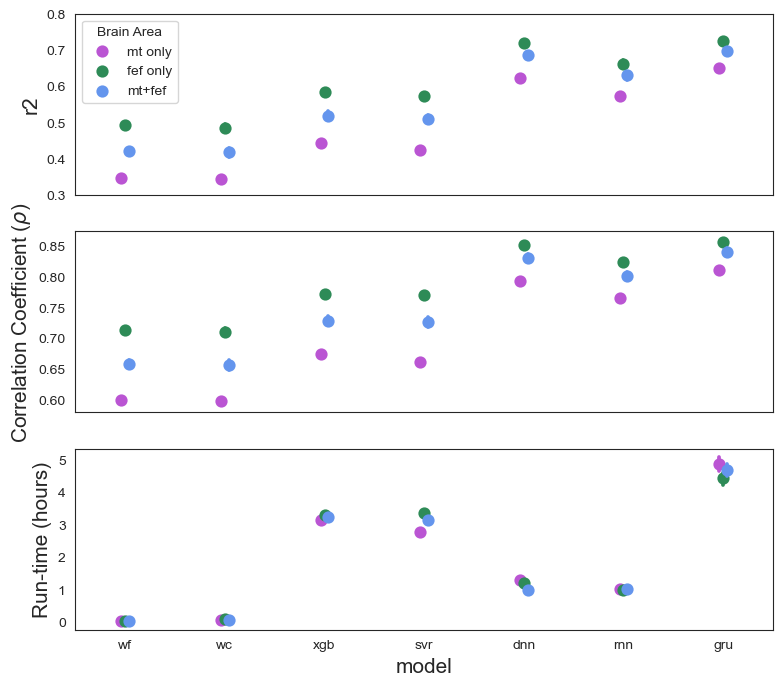

In [152]:
fig, axes = plt.subplots(3,1,figsize=(9,8)) #Create figure (11 rows by 3 columns)

m = 0
a = sns.pointplot(ax=axes[m],data=df,x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
a.set(ylim=(0.3, 0.8))
a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
#a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m],data=df,x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.get_legend().remove()

m=m+1
a = sns.pointplot(ax=axes[m],data=df,x="model",y="time",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel='Run-time (hours)')
#a.set(title='MT only')
#a.set(xticklabels=[])
a.get_legend().remove()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

wc_fef only vs. wc_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:1.987e-14 U_stat=7.482e+03
xgb_mt only vs. xgb_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:2.562e-34 U_stat=0.000e+00
xgb_fef only vs. xgb_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:6.625e-14 U_stat=8.068e+03
svr_mt only vs. svr_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:3.243e-34 U_stat=8.000e+00
svr_fef only vs. svr_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:6.750e-14 U_stat=8.067e+03
dnn_mt only vs. dnn_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:3.130e-33 U_stat=8.400e+01
dnn_fef only vs. dnn_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:1.524e-07 U_stat=7.149e+03
rnn_mt only vs. rnn_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:1.999e-26 U_stat=6.460e+02
rnn_fef only vs. 

<Figure size 640x480 with 0 Axes>

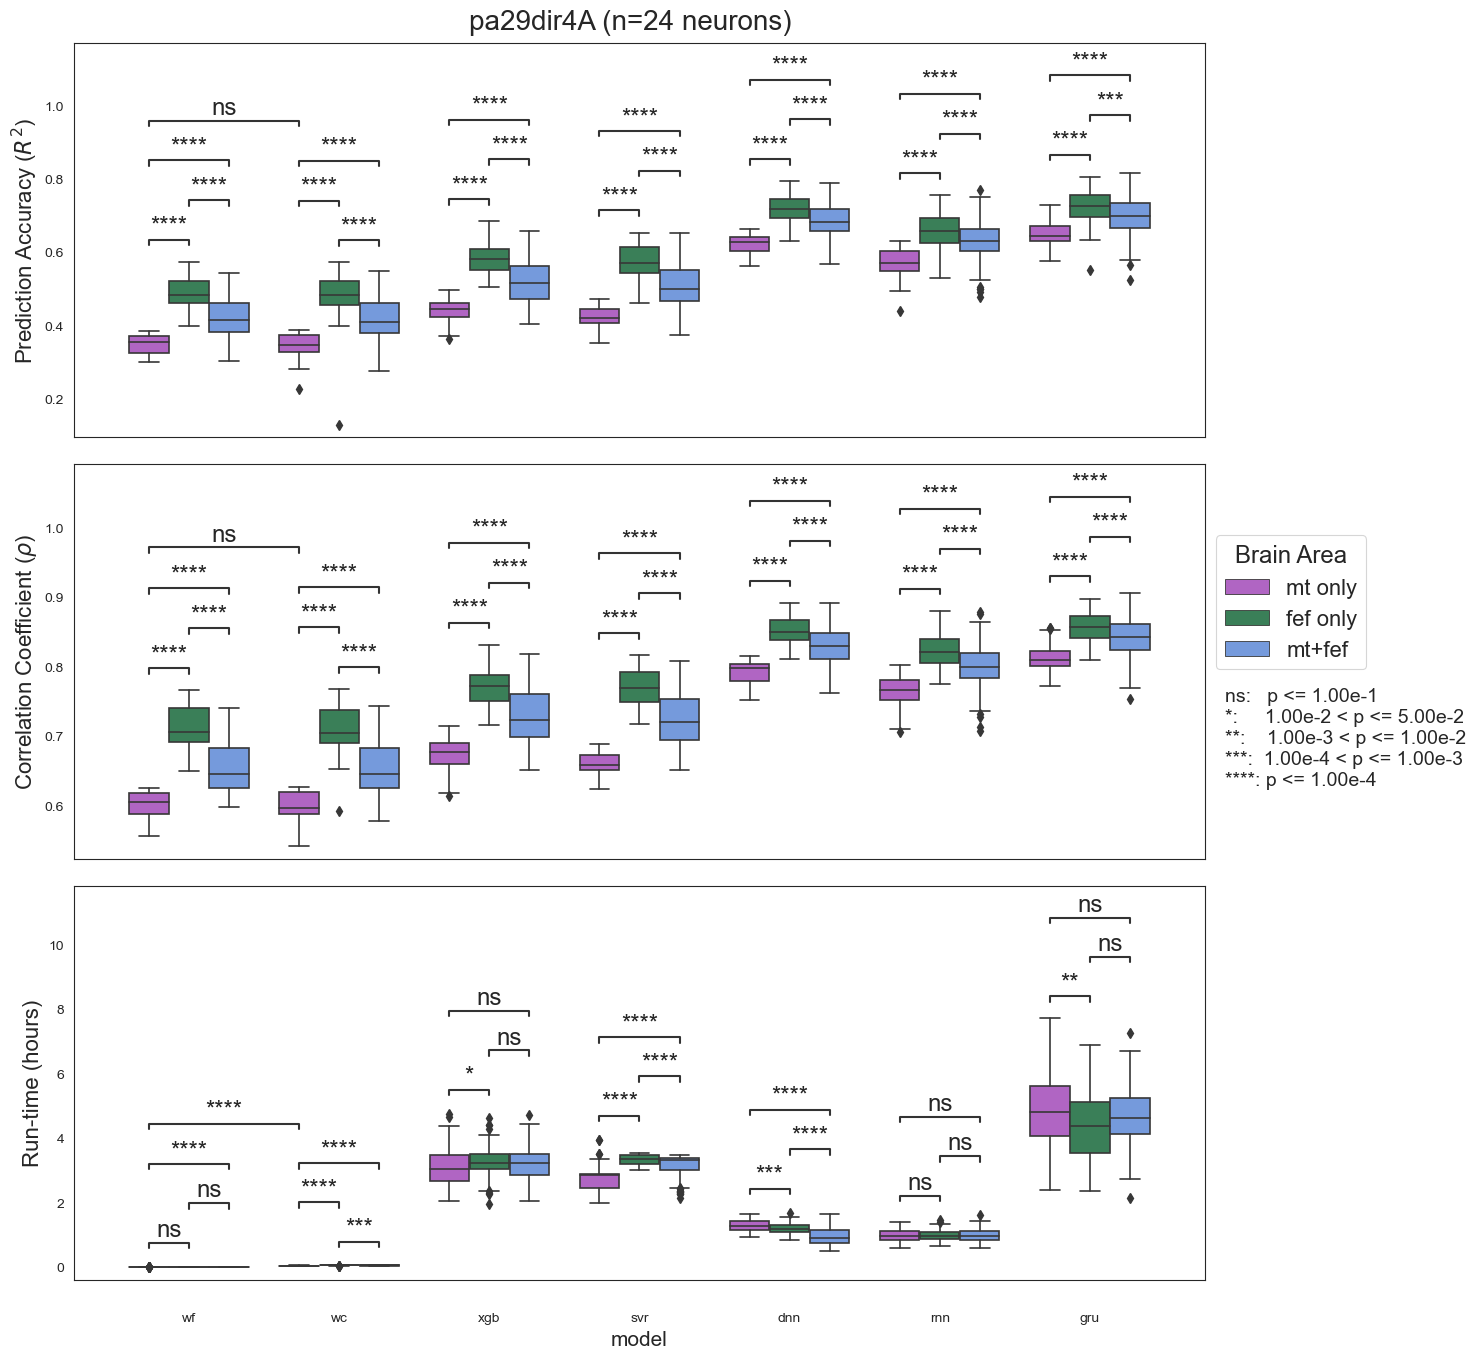

In [175]:
import matplotlib as mpl

sns.despine()
sns.set_style("ticks")
sns.set_style("white")

pairs = [
    [('wf', 'mt only'), ('wf', 'fef only')],
    [('wf', 'mt only'), ('wf', 'mt+fef')],
    [('wf', 'fef only'), ('wf', 'mt+fef')],

    [('wc', 'mt only'), ('wc', 'fef only')],
    [('wc', 'mt only'), ('wc', 'mt+fef')],
    [('wc', 'fef only'), ('wc', 'mt+fef')],

    [('xgb', 'mt only'), ('xgb', 'fef only')],
    [('xgb', 'mt only'), ('xgb', 'mt+fef')],
    [('xgb', 'fef only'), ('xgb', 'mt+fef')],
    
    [('svr', 'mt only'), ('svr', 'fef only')],
    [('svr', 'mt only'), ('svr', 'mt+fef')],
    [('svr', 'fef only'), ('svr', 'mt+fef')],
    
    [('dnn', 'mt only'), ('dnn', 'fef only')],
    [('dnn', 'mt only'), ('dnn', 'mt+fef')],
    [('dnn', 'fef only'), ('dnn', 'mt+fef')],
    
    [('rnn', 'mt only'), ('rnn', 'fef only')],
    [('rnn', 'mt only'), ('rnn', 'mt+fef')],
    [('rnn', 'fef only'), ('rnn', 'mt+fef')],
    
    [('gru', 'mt only'), ('gru', 'fef only')],
    [('gru', 'mt only'), ('gru', 'mt+fef')],
    [('gru', 'fef only'), ('gru', 'mt+fef')],
    
    [('wf', 'mt only'), ('wc', 'mt only')]
]

hue_plot_params[0] = {'data': df,'x': 'model','y': 'r2',"hue": "Brain Area","palette": colors}
hue_plot_params[1] = {'data': df,'x': 'model','y': 'rho',"hue": "Brain Area","palette": colors}
hue_plot_params[2] = {'data': df,'x': 'model','y': 'time',"hue": "Brain Area","palette": colors}


fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle('pa29dir4A (n=24 neurons)',fontsize=20)

with sns.plotting_context("paper", font_scale = 1.8):
    m=0
    a1 = sns.boxplot(ax=axes[m], **hue_plot_params[m])
    annotator = Annotator(axes[m], pairs, **hue_plot_params[m])
    annotator.configure(test="Mann-Whitney").apply_and_annotate()
    a1.set(xticklabels=[])
    a1.set(xlabel=None)
    a1.set_ylabel('Prediction Accuracy ($R^2$)', fontsize = 16)
    a1.get_legend().remove()
    m=m+1
    
    a2 = sns.boxplot(ax=axes[m], **hue_plot_params[m])
    annotator = Annotator(axes[m], pairs, **hue_plot_params[m])
    annotator.configure(test="Mann-Whitney").apply_and_annotate()
    a2.set(xticklabels=[])
    a2.set(xlabel=None)
    a2.set_ylabel(r'Correlation Coefficient ($\rho$)', fontsize = 16)
    sns.move_legend(a2, "center left", bbox_to_anchor=(1, 0.65))
    a2.text(6.9, 0.63,'ns:   p <= 1.00e-1 \n*:     1.00e-2 < p <= 5.00e-2 \n**:    1.00e-3 < p <= 1.00e-2 \n***:  1.00e-4 < p <= 1.00e-3 \n****: p <= 1.00e-4', fontsize=14) #add text
    
    m=m+1
    
    a3 = sns.boxplot(ax=axes[m], **hue_plot_params[m])
    annotator = Annotator(axes[m], pairs, **hue_plot_params[m])
    annotator.configure(test="Mann-Whitney").apply_and_annotate()
    #a3.set(xticklabels=[])
    #a3.set(xlabel=None)
    a3.set_ylabel('Run-time (hours)', fontsize = 16)
    a3.get_legend().remove()

    #add_legend(ax1)
    #sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
    #ax1.set(xlabel='Model Type')
    #ax1.set(ylabel='Prediction Accuracy ($R^2$)')
    #ax.set(title='pa29dir4A (n=24 neurons)')
    
    fig.savefig(fig_folder+'ffmodels_r2_pa29dir4A.png', dpi=300, bbox_inches='tight')
    #ax1.text(7, 0.35,'ns:   p <= 1.00e-1 \n*:     1.00e-2 < p <= 5.00e-2 \n**:    1.00e-3 < p <= 1.00e-2 \n***:  1.00e-4 < p <= 1.00e-3 \n****: p <= 1.00e-4', fontsize=10) #add text
    
    #plt.show()
    


In [ ]:
mt_wf = df.loc[(df['Brain Area']=='mt only') & (df['model']=='wf'), "r2"].values
fef_wf =  df.loc[(df['Brain Area']=='fef only') & (df['model']=='wf'), "r2"].values
mtfef_wf = df.loc[(df['Brain Area']=='mt+fef') & (df['model']=='wf'), "r2"].values

stat_results = [
  mannwhitneyu(mt_wf, fef_wf, alternative="two-sided"),
  mannwhitneyu(fef_wf, mtfef_wf, alternative="two-sided"),
  mannwhitneyu(mt_wf, mtfef_wf, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

print("MT vs FEF: \n", stat_results[0], "\n")
print("FEF vs MT+FEF: \n", stat_results[1], "\n")
print("MT vs MT+FEF: \n", stat_results[2], "\n")

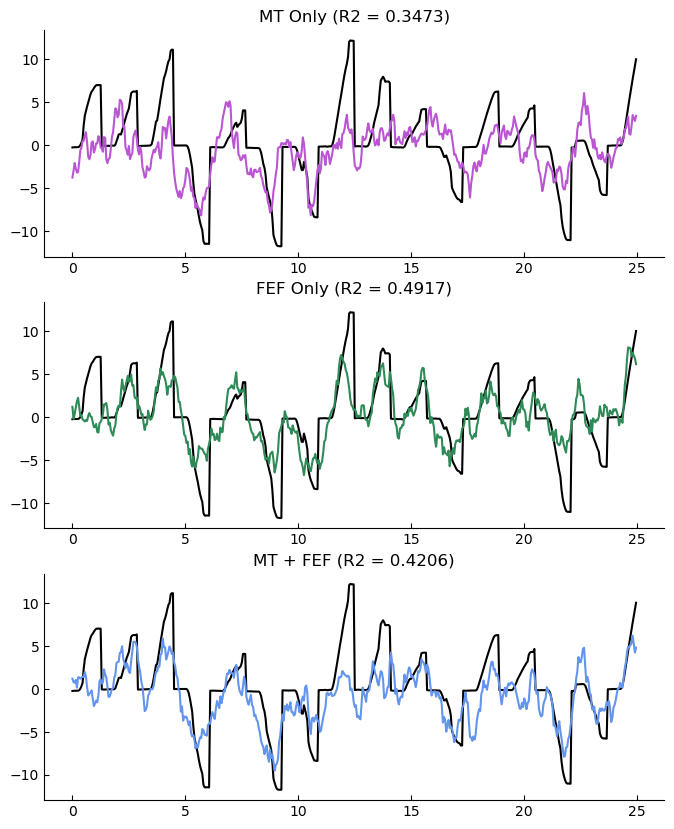

In [10]:
ts=np.arange(0,500) #Plot samples 500-800
samp = 4

fig_traces, ax = plt.subplots(3,1,figsize=(8,10)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF (mix FEF + MT)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[0][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 

#WF (FEF only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[1][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('FEF Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1

#WF (MT only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[2][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT + FEF (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

